In [1]:
# Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import gc
import cv2
import math
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#consolidated
import os
import shutil


def move_and_rename_images(source_folder, destination_folder):
    class_folders = os.listdir(source_folder)

    for class_folder in class_folders:
        class_folder_path = os.path.join(source_folder, class_folder)

        if os.path.isdir(class_folder_path):
            # Process images in each class subfolder
            for filename in os.listdir(class_folder_path):
                source_path = os.path.join(class_folder_path, filename)
                new_filename = f"{class_folder}.{filename}"
                destination_path = os.path.join(
                    destination_folder, new_filename)

                # Move and rename the file
                shutil.move(source_path, destination_path)


# Path to your 'consolidated' folder
consolidated_folder_path = 'consolidated'

# Move and rename images from subfolders to the main 'consolidated' folder
move_and_rename_images(consolidated_folder_path, consolidated_folder_path)

In [3]:
#valid
import os
import shutil


def move_and_rename_images(source_folder, destination_folder):
    class_folders = os.listdir(source_folder)

    for class_folder in class_folders:
        class_folder_path = os.path.join(source_folder, class_folder)

        if os.path.isdir(class_folder_path):
            # Process images in each class subfolder
            for filename in os.listdir(class_folder_path):
                source_path = os.path.join(class_folder_path, filename)
                new_filename = f"{class_folder}.{filename}"
                destination_path = os.path.join(
                    destination_folder, new_filename)

                # Move and rename the file
                shutil.move(source_path, destination_path)


consolidated_folder_path = 'valid'

# Move and rename images from subfolders to the main 'consolidated' folder
move_and_rename_images(consolidated_folder_path, consolidated_folder_path)

In [4]:
#path consolidated
import os
import pandas as pd


def create_dataframe_from_image_folder(folder_path):
    filepaths = []
    labels = []
    flist = os.listdir(folder_path)

    for f in flist:
        fpath = os.path.join(folder_path, f)
        filepaths.append(fpath)
        label = f.split('.')[0]  # Extracting class name from file name
        labels.append(label)

    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis=1)

    return df


# Replace the path with the correct path to your folder
folder_path = 'consolidated'
df = create_dataframe_from_image_folder(folder_path)

In [5]:
df

,filepaths,labels
0,consolidated\Autistic,Autistic
1,consolidated\Autistic.51456.nii,Autistic
2,consolidated\Autistic.51457.nii,Autistic
3,consolidated\Autistic.51458.nii,Autistic
4,consolidated\Autistic.51459.nii,Autistic
5,consolidated\Autistic.51460.nii,Autistic
6,consolidated\Autistic.51461.nii,Autistic
7,consolidated\Autistic.51462.nii,Autistic
8,consolidated\Autistic.51463.nii,Autistic
9,consolidated\Autistic.51464.nii,Autistic


In [6]:
#jpg consolidated
import os
import nibabel as nib
import matplotlib.pyplot as plt


def nii_folder_to_jpg(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over files in input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.nii'):
            # Load NIfTI file
            nii_file = os.path.join(input_folder, filename)
            nii_image = nib.load(nii_file)

            # Extract image data array
            data = nii_image.get_fdata()

            # Plot and save each slice as JPG
            for i in range(data.shape[2]):
                plt.imshow(data[:, :, i], cmap='gray')
                plt.axis('off')
                jpg_filename = os.path.splitext(
                    filename)[0] + f'_slice_{i}.jpg'
                jpg_path = os.path.join(output_folder, jpg_filename)
                plt.savefig(jpg_path, bbox_inches='tight', pad_inches=0)
                plt.close()


# Example usage
input_folder = 'consolidated'
output_folder = 'consolidated_jpg'

nii_folder_to_jpg(input_folder, output_folder)

In [7]:
#filtered consolidated
import os
import numpy as np
from PIL import Image


def remove_black_images(input_folder, output_folder, intensity_threshold=10):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over files in input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            # Load JPG image
            jpg_file = os.path.join(input_folder, filename)
            image = np.array(Image.open(jpg_file))

            # Check if the image is black
            if np.max(image) > intensity_threshold:
                # Save the image to the output folder
                output_file = os.path.join(output_folder, filename)
                Image.fromarray(image).save(output_file)


# Example usage
input_folder = 'consolidated_jpg'
output_folder = 'filtered_consolidated_jpg'

remove_black_images(input_folder, output_folder)

In [8]:
#valid jpg
import os
import nibabel as nib
import matplotlib.pyplot as plt


def nii_folder_to_jpg(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over files in input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.nii'):
            # Load NIfTI file
            nii_file = os.path.join(input_folder, filename)
            nii_image = nib.load(nii_file)

            # Extract image data array
            data = nii_image.get_fdata()

            # Plot and save each slice as JPG
            for i in range(data.shape[2]):
                plt.imshow(data[:, :, i], cmap='gray')
                plt.axis('off')
                jpg_filename = os.path.splitext(
                    filename)[0] + f'_slice_{i}.jpg'
                jpg_path = os.path.join(output_folder, jpg_filename)
                plt.savefig(jpg_path, bbox_inches='tight', pad_inches=0)
                plt.close()


# Example usage
input_folder = 'valid'
output_folder = 'valid_jpg'

nii_folder_to_jpg(input_folder, output_folder)

In [9]:
#filtered valid
import os
import numpy as np
from PIL import Image


def remove_black_images(input_folder, output_folder, intensity_threshold=10):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over files in input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            # Load JPG image
            jpg_file = os.path.join(input_folder, filename)
            image = np.array(Image.open(jpg_file))

            # Check if the image is black
            if np.max(image) > intensity_threshold:
                # Save the image to the output folder
                output_file = os.path.join(output_folder, filename)
                Image.fromarray(image).save(output_file)


# Example usage
input_folder = 'valid_jpg'
output_folder = 'filtered_valid_jpg'

remove_black_images(input_folder, output_folder)

In [5]:
import os
import pandas as pd


def create_dataframe_from_image_folder(folder_path):
    filepaths = []
    labels = []
    flist = os.listdir(folder_path)

    for f in flist:
        fpath = os.path.join(folder_path, f)
        filepaths.append(fpath)
        label = f.split('.')[0]  # Extracting class name from file name
        labels.append(label)

    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis=1)

    return df


# Replace the path with the correct path to your folder
folder_path = 'filtered_consolidated_jpg'
df = create_dataframe_from_image_folder(folder_path)

In [6]:
df

,filepaths,labels
0,filtered_consolidated_jpg\Autistic.51456_slice...,Autistic
1,filtered_consolidated_jpg\Autistic.51456_slice...,Autistic
2,filtered_consolidated_jpg\Autistic.51456_slice...,Autistic
3,filtered_consolidated_jpg\Autistic.51456_slice...,Autistic
4,filtered_consolidated_jpg\Autistic.51456_slice...,Autistic
...,...,...
6889,filtered_consolidated_jpg\Non_Autistic.51493_s...,Non_Autistic
6890,filtered_consolidated_jpg\Non_Autistic.51493_s...,Non_Autistic
6891,filtered_consolidated_jpg\Non_Autistic.51493_s...,Non_Autistic
6892,filtered_consolidated_jpg\Non_Autistic.51493_s...,Non_Autistic


In [7]:
# we are reading 941 images from each class from the balanced dataframe for train set


file_count = 2068
samples = []
for category in df['labels'].unique():
    category_slice = df.query("labels == @category")
    samples.append(category_slice.sample(file_count, random_state=12))
df_train = pd.concat(samples, axis=0).sample(
    frac=1.0, random_state=12).reset_index(drop=True)
print(df_train['labels'].value_counts())
print(len(df_train))

labels
Autistic        2068
Non_Autistic    2068
Name: count, dtype: int64
4136


In [13]:
import os
import shutil


def move_images_to_class_folders(df, base_folder_path):
    for index, row in df.iterrows():
        # Extract filename and class name
        filename = row['filepaths']
        class_name = row['labels']

        # Create a folder for the class if it doesn't exist
        class_folder_path = os.path.join(base_folder_path, class_name)
        if not os.path.exists(class_folder_path):
            os.makedirs(class_folder_path)

        # Source path for the image file
        source_path = filename

        # Destination path in the class folder
        destination_path = os.path.join(
            class_folder_path, os.path.basename(filename))

        shutil.copy(source_path, destination_path)


move_images_to_class_folders(df_train, 'train')

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt


def nii_folder_to_jpg(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over files in input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.nii'):
            # Load NIfTI file
            nii_file = os.path.join(input_folder, filename)
            nii_image = nib.load(nii_file)

            # Extract image data array
            data = nii_image.get_fdata()

            # Plot and save each slice as JPG
            for i in range(data.shape[2]):
                plt.imshow(data[:, :, i], cmap='gray')
                plt.axis('off')
                jpg_filename = os.path.splitext(
                    filename)[0] + f'_slice_{i}.jpg'
                jpg_path = os.path.join(output_folder, jpg_filename)
                plt.savefig(jpg_path, bbox_inches='tight', pad_inches=0)
                plt.close()


# Example usage
input_folder = 'train'
output_folder = 'train_jpg'

nii_folder_to_jpg(input_folder, output_folder)

In [2]:
import os
import numpy as np
from PIL import Image


def remove_black_images(input_folder, output_folder, intensity_threshold=10):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over files in input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            # Load JPG image
            jpg_file = os.path.join(input_folder, filename)
            image = np.array(Image.open(jpg_file))

            # Check if the image is black
            if np.max(image) > intensity_threshold:
                # Save the image to the output folder
                output_file = os.path.join(output_folder, filename)
                Image.fromarray(image).save(output_file)


# Example usage
input_folder = 'train_jpg'
output_folder = 'filtered_train_jpg'

remove_black_images(input_folder, output_folder)

In [23]:
# we are reading 235 images from each class from the balanced dataframe for valid


file_count = 514
samples = []
for category in df['labels'].unique():
    category_slice = df.query("labels == @category")
    samples.append(category_slice.sample(file_count, random_state=124))
df_valid = pd.concat(samples, axis=0).sample(
    frac=1.0, random_state=124).reset_index(drop=True)
print(df_valid['labels'].value_counts())
print(len(df_valid))

labels
Autistic        514
Non_Autistic    514
Name: count, dtype: int64
1028


In [24]:
move_images_to_class_folders(df_valid, 'valid')

In [21]:
# we are reading 294 images from each class from the balanced dataframe for test set

file_count = 822
samples = []
for category in df['labels'].unique():
    category_slice = df.query("labels == @category")
    samples.append(category_slice.sample(file_count, random_state=124))
df_test = pd.concat(samples, axis=0).sample(
    frac=1.0, random_state=124).reset_index(drop=True)
print(df_test['labels'].value_counts())
print(len(df_test))

labels
Non_Autistic    822
Autistic        822
Name: count, dtype: int64
1644


In [22]:
move_images_to_class_folders(df_valid, 'test')

In [25]:
#printing the total number of  train, valid and test images

!echo '.........Training data...........'
print( df_train['labels'].value_counts())
print( 'Total train images' ,df_train['labels'].value_counts().sum())

!echo '.........Valid data..............'
print( df_valid['labels'].value_counts())
print( 'Total valid images' ,df_valid['labels'].value_counts().sum())

!echo '.........Test data...........'
print( df_test['labels'].value_counts())
print( 'Total test images' ,df_test['labels'].value_counts().sum())

sum1= df_train['labels'].value_counts().sum() + df_valid['labels'].value_counts().sum() + df_test['labels'].value_counts().sum()

print('......Total dataset images =  ', sum1,'.....')

'.........Training data...........'
labels
Autistic        2068
Non_Autistic    2068
Name: count, dtype: int64
Total train images 4136
'.........Valid data..............'
labels
Autistic        514
Non_Autistic    514
Name: count, dtype: int64
Total valid images 1028
'.........Test data...........'
labels
Non_Autistic    822
Autistic        822
Name: count, dtype: int64
Total test images 1644
......Total dataset images =   6808 .....


In [37]:
# Initilizing the input parameters for the images and batch size
# we are resizing all the images into 224x224 pixels and 3 channels (RGB) will be used
# batch size of 32 images will be transferred at each iteration during training to reduce the computational power
height = 224
width = 224
channels = 3
batch_size = 16
img_shape = (height, width, channels)
img_size = (height, width)

In [38]:
# Libraries

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

In [40]:
gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, vertical_flip=False,
                         rotation_range=5, width_shift_range=[-.1, .1], height_shift_range=[-.1, .1])

In [41]:
train_gen = gen.flow_from_dataframe(df_train, x_col='filepaths', y_col='labels', target_size=img_size,
                                    class_mode='categorical', batch_size=batch_size, color_mode="rgb")

Found 4136 validated image filenames belonging to 2 classes.


In [42]:
valid_gen = gen.flow_from_dataframe(df_valid, x_col='filepaths', y_col='labels', target_size=img_size,
                                    class_mode='categorical', batch_size=batch_size, color_mode='rgb')

Found 1028 validated image filenames belonging to 2 classes.


In [43]:
test_gen = gen.flow_from_dataframe(df_test, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', batch_size=batch_size, color_mode='rgb')

Found 1644 validated image filenames belonging to 2 classes.


In [44]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, ZeroPadding2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import Xception

In [45]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model


def build_model():
    BaseModel = MobileNetV2(
        weights='imagenet', include_top=False, input_shape=(img_shape))
    BaseModel.trainable = False
    headModel = BaseModel.output
    headModel = BatchNormalization()(headModel)
    headModel = Flatten()(headModel)

    headModel = Dense(512, activation='relu')(headModel)
    headModel = BatchNormalization()(headModel)
    headModel = Dense(512, activation='relu')(headModel)
    headModel = Dropout(0.2)(headModel)
    output = Dense(2, activation='softmax')(headModel)

    model = Model(inputs=BaseModel.input, outputs=output)

    return model


# build the model
model_mobilenet = build_model()
model_mobilenet.summary()


model_mobilenet.compile(optimizer=RMSprop(
    1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
Model = model_mobilenet.fit(
    train_gen,  validation_data=valid_gen,  epochs=50, verbose=1)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 34,641,986 (132.15 MB)

 Trainable params: 32,380,418 (123.52 MB)

 Non-trainable params: 2,261,568 (8.63 MB)

Epoch 1/50


c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


259/259 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.5738 - loss: 0.9434 - val_accuracy: 0.7257 - val_loss: 0.6453
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.7205 - loss: 0.6014 - val_accuracy: 0.7996 - val_loss: 0.4696
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.7789 - loss: 0.4801 - val_accuracy: 0.8239 - val_loss: 0.3928
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.8039 - loss: 0.4169 - val_accuracy: 0.8249 - val_loss: 0.4004
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 454s 2s/step - accuracy: 0.8120 - loss: 0.4174 - val_accuracy: 0.8453 - val_loss: 0.3927
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.8369 - loss: 0.3683 - val_accuracy: 0.8852 - val_loss: 0.2635
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 454s 2s/step - accuracy: 0.8449 - loss: 0.3424 - val_accuracy: 0.8784 - val_loss: 0.2912
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.8619 - loss: 0.3097 - val_accuracy: 0.881

In [46]:
model_mobilenet.save('mobile_net.keras')

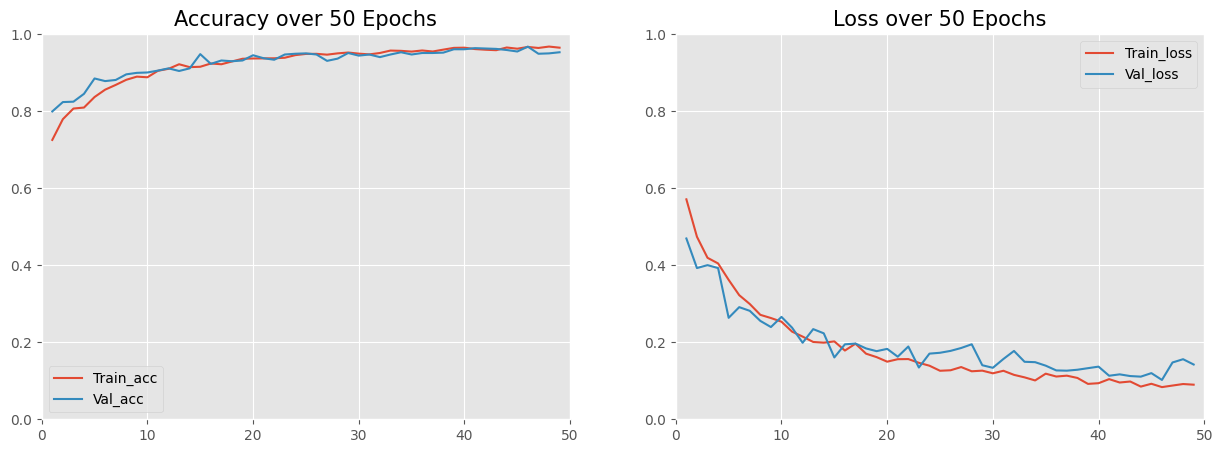

In [48]:
# Plot the accuracy and loss graphs
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.style.use('ggplot')
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.xlim(0, epochs)
    plt.ylim(0, )
    plt.plot(range(1, epochs), acc[1:], label='Train_acc')
    plt.plot(range(1, epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(0, epochs)
    plt.ylim(0, )
    plt.plot(range(1, epochs), loss[1:], label='Train_loss')
    plt.plot(range(1, epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)

    plt.show()


plot_acc_loss(Model, 50)

c:\Users\ibrah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step
Confusion Matrix:
 [[789  33]
 [ 26 796]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       822
           1       0.96      0.97      0.96       822

    accuracy                           0.96      1644
   macro avg       0.96      0.96      0.96      1644
weighted avg       0.96      0.96      0.96      1644



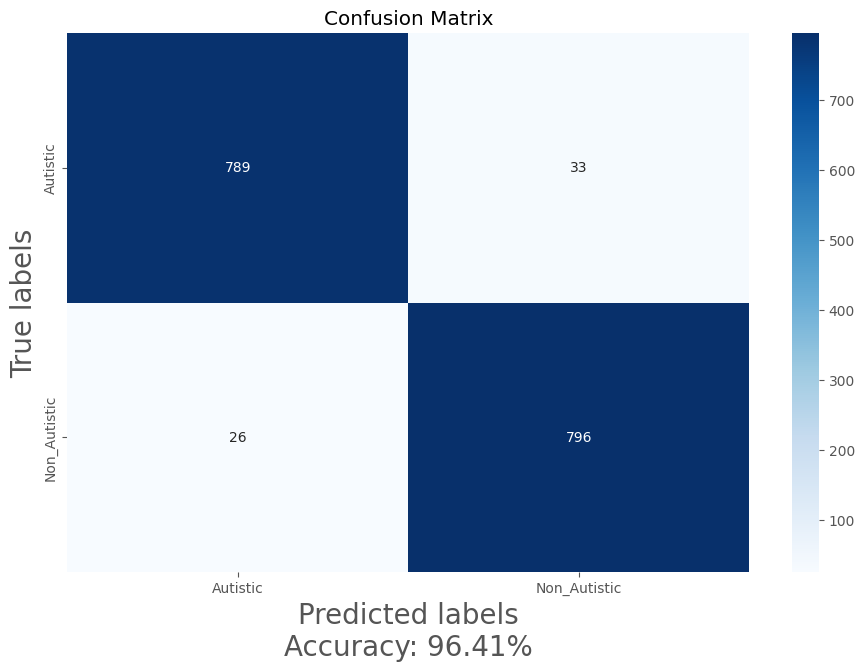

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

eval_generator = test_gen
eval_generator.shuffle = False  # Disable shuffling

# Reset the generator
eval_generator.reset()

# Collect true labels
true_labels = []
for i in range(len(eval_generator)):
    X, y = eval_generator[i]
    true_labels.extend(np.argmax(y, axis=-1))

# Ensure true_labels is a numpy array for later comparison
true_labels = np.array(true_labels)

# Reset the generator again for prediction
eval_generator.reset()

# Predict using the model
steps = int(np.ceil(len(eval_generator)))
predictions = model_mobilenet.predict(eval_generator, steps=steps, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)

# Ensure lengths are consistent
assert len(predicted_classes) == len(
    true_labels), "Mismatch in predicted and true labels length"

# Calculate accuracy
accuracy = np.mean(predicted_classes == true_labels)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Classification Report
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(
    true_labels, predicted_classes))

# Plotting Confusion Matrix
plt.figure(figsize=(11, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=eval_generator.class_indices, yticklabels=eval_generator.class_indices)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy*100:.2f}%', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix')
plt.show()